In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64 # batchsize

path = untar_data(URLs.MNIST); # this downloads the (default) dataset
path.ls()
# the images are saved under testing/<category number>/<name>.png

[PosixPath('/content/data/mnist_png/models'),
 PosixPath('/content/data/mnist_png/training'),
 PosixPath('/content/data/mnist_png/testing')]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

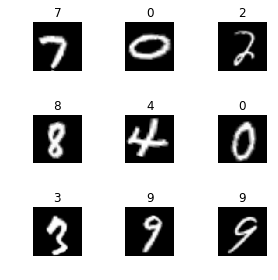

In [0]:
np.random.seed(42)
# this implictly splits into 80/20
# scaled the images a bit down to reduce training time
data=ImageDataBunch.from_folder(path,train='training',valid='testing',ds_tfms=get_transforms(do_flip=False),size=16*7, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(4,4))
print(data.classes)
len(data.classes),data.c

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy,error_rate])

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.176822,0.079976,0.976400,0.023600,03:38
1,0.087094,0.038230,0.987300,0.012700,03:39
2,0.062579,0.026528,0.991200,0.008800,03:38
3,0.045009,0.024247,0.992000,0.008000,03:38


In [0]:
learn.save('stage-1')

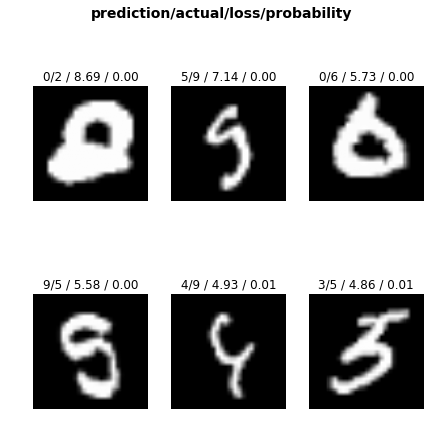

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(6, figsize=(7,7))


The top_losses show that the model confuses some characters that would be hard for a human to recognize aswell like the 2nd example of 9/8. However some that are pretty clear to a human observer like the 9/4 confusion are still in the top losses.

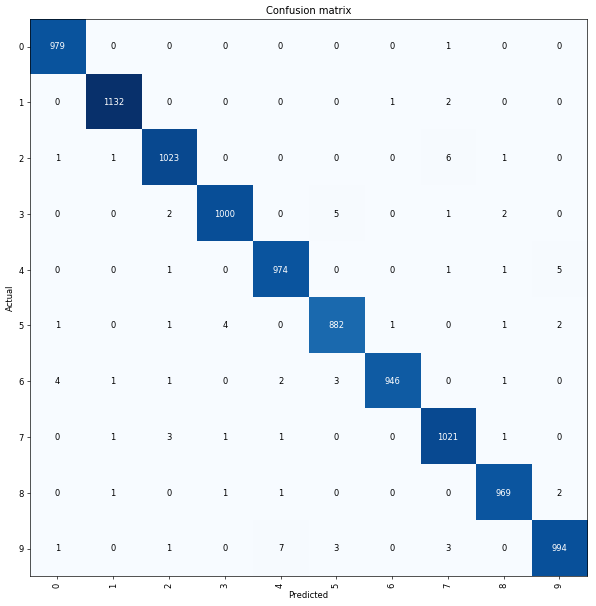

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('9', '4', 7),
 ('2', '7', 6),
 ('3', '5', 5),
 ('4', '9', 5),
 ('5', '3', 4),
 ('6', '0', 4),
 ('6', '5', 3),
 ('7', '2', 3),
 ('9', '5', 3),
 ('9', '7', 3),
 ('1', '7', 2),
 ('3', '2', 2),
 ('3', '8', 2),
 ('5', '9', 2),
 ('6', '4', 2),
 ('8', '9', 2)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


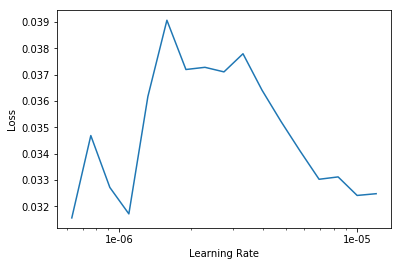

In [0]:
# Unfreeze, train one more cycle with fine tuning
learn.load('stage-1');
learn.lr_find()
learn.unfreeze()
learn.recorder.plot() # this plot is kinda awkward, we probably have a pretty good result already

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1) #max_lr=slice(1e-6,1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.028960,0.013417,0.996000,0.004000,04:00


## Bonus

The confusion matrix shows which samples got predicted correctly and which ones got "confused". In the diagonal we see the correct predictions, with the incorrect ones being in the other fields around it. By looking up high numbers that are not in the diagonal we can see which samples get misclassified/confused the most. 

Plotting top losses shows visualy which images got mixed up. In this case we can see that even for human these are hard to classify because they are drawn kind of badly.